# Learnable ISTA: Application in Sparse Coding

- Description: This notebook demonstrates the application of the ISTA algorithm for sparse coding.


In [1]:
# ============================================================
# Setup for (L)ISTA Algorithm Simulation
# This cell initialises the necessary libraries and sets the device.
# ============================================================

__author__ = "Faisal Jayousi"

import numpy as np
import matplotlib.pyplot as plt
import torch

from src.generate_data import generate
from src.train import train_model, save_model
from src.ista import ista

# Set the style for the plots
plt.style.use("seaborn-v0_8-deep")

# Determine the device to use for computations (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [2]:
# ============================================================
# Define parameters for sparse signal simulation and training
# ============================================================

# Dimensions for the sparse signal
m = 1000  # Number of measurements
n = 256   # Number of features (signal dimensions)
k = 5     # Sparsity level (number of non-zero elements)
N = 5000  # Number of samples to generate

# Simulate the sparse signal and measurement matrix
x, z, w_d = generate(m, n, k, N)

# Training parameters for LISTA
learning_rate = 0.1  # Learning rate for model training
batch_size = 128
alpha = 0.05  # Regularisation parameter
L = 2  # Lipschitz constant
max_iterations = 30
n_epochs = 100  # Number of epochs

# Train the LISTA model
net, err_list = train_model(
    x, w_d, alpha, L, learning_rate, batch_size, max_iterations, n_epochs)

Epoch: 0/100
Epoch: 10/100
Epoch: 20/100
Epoch: 30/100
Epoch: 40/100
Epoch: 50/100
Epoch: 60/100
Epoch: 70/100
Epoch: 80/100
Epoch: 90/100


In [3]:
# # ===============================
# # Optional: Save Model Checkpoint
# # ===============================

# import os

# # Define path for checkpoint directory and file
# checkpoint_dir = "checkpoints"
# checkpoint_file = "trained_model.pkl"
# checkpoint_path = os.path.join(checkpoint_dir, checkpoint_file)

# # Save model and error list using the save_model function
# save_model(checkpoint_path, (net.to("cpu"), err_list), verbose=True)

## Testing


In [4]:
# Test using one sample
N = 1
x, z, _ = generate(m, n, k, N, w_d)

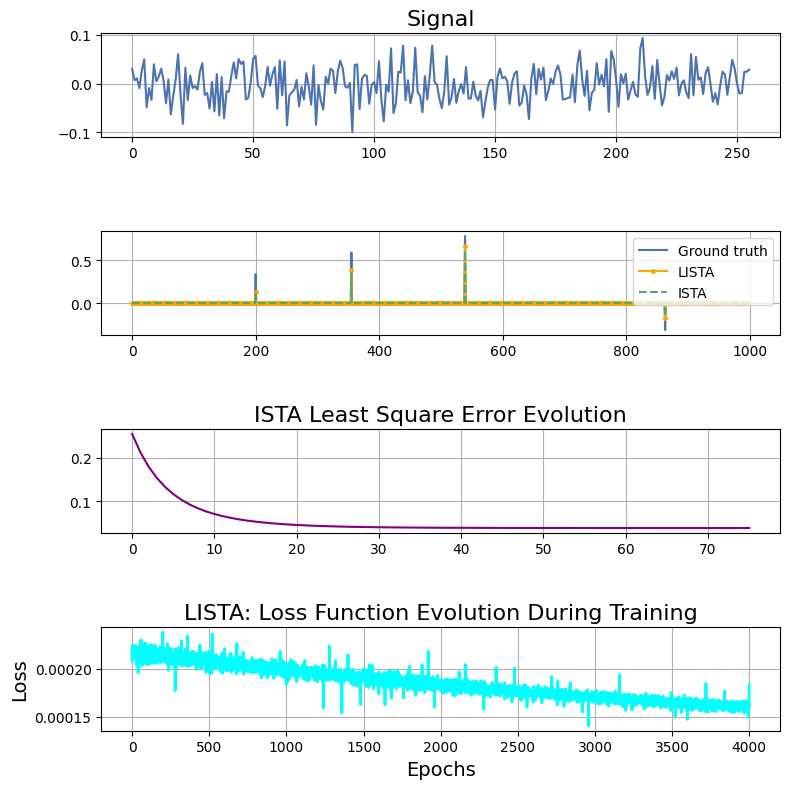

Error of ISTA reconstruction: 0.400
Error of LISTA reconstruction: 0.343


In [5]:
# ========================
# Comparing ISTA and LISTA
# ========================

# Compute reconstructions
z_recon_lista = net(torch.from_numpy(x).float().to(device))
z_recon_lista = z_recon_lista.detach().cpu().numpy()

z_recon_ista, recon_errors_ista = ista(
    np.transpose(x), w_d, alpha, L, m, eps=1e-5)

# Plot settings
plt.figure(figsize=(8, 8))

# Plot Measurement x
plt.subplot(4, 1, 1)
plt.plot(x.flatten(), linewidth=1.5)
plt.title("Signal", fontsize=16)
plt.grid(True)

# Plot Ground Truth and Reconstructions
plt.subplot(4, 1, 2)
plt.plot(z.flatten(), label='Ground truth', linewidth=1.5)
plt.plot(z_recon_lista.flatten(), '.-',
         label="LISTA", color='orange', markersize=5)
plt.plot(z_recon_ista, '--', label="ISTA")
plt.grid(True)
plt.legend()

# Plot ISTA Reconstruction Errors
plt.subplot(4, 1, 3)
plt.plot(recon_errors_ista, color="purple", linewidth=1.5)
plt.title("ISTA Least Square Error Evolution", fontsize=16)
plt.grid(True)

# Plot LISTA Loss Function Evolution
plt.subplot(4, 1, 4)
plt.plot(err_list, color='cyan', linewidth=2)
plt.title('LISTA: Loss Function Evolution During Training', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.grid(True)

# Show plots
plt.subplots_adjust(hspace=10)
plt.tight_layout()
plt.show()

ista_err = np.linalg.norm(z_recon_ista.flatten() - z.flatten())
lista_err = np.linalg.norm(z_recon_lista.flatten() - z.flatten())

print(f'Error of ISTA reconstruction: {ista_err:.3f}')
print(f'Error of LISTA reconstruction: {lista_err:.3f}')

## References

- Gregor, K. & LeCun, Y. (2010). Learning Fast Approximations of Sparse Coding. In J. Fürnkranz & T. Joachims (eds.), ICML (p./pp. 399-406), : Omnipress.
  https://icml.cc/Conferences/2010/papers/449.pdf
